In [1]:
%matplotlib inline
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom
import pandas as pd
import numpy as np

from minavrfpy import lib

## single epoch

In [3]:
epoch = 18
bp_key = "B62qrQiw9JhUumq457sMxicgQ94Z1WD9JChzJu19kBE8Szb5T8tcUAC"

results = lib.get_epoch_df(epoch, block_producer_key=bp_key)

df = results['df']
stakes_df = results['stakes_df']

## outcome per epoch

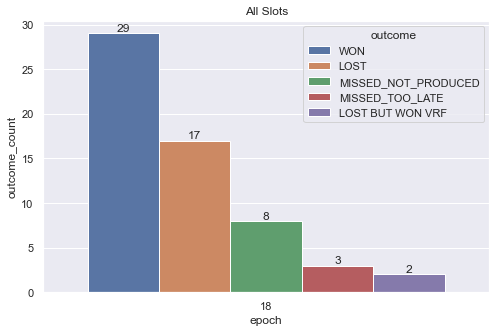

In [4]:
sns.set(rc={"figure.figsize": (8, 5)})


counts_df = (
    df.groupby("epoch")
    .outcome.value_counts()
    .to_frame()
    .rename(columns={"outcome": "outcome_count"})
    .reset_index()
)

ax = sns.barplot(x="epoch", y="outcome_count", data=counts_df, hue="outcome")
ax.set_title("All Slots")
for container in ax.containers:
    ax.bar_label(container)

## outcome grouped by super_charged

In [5]:
df.groupby(["epoch", "super_charged"]).outcome.value_counts()

epoch  super_charged  outcome            
18     False          WON                    17
                      LOST                   16
                      MISSED_NOT_PRODUCED     3
                      MISSED_TOO_LATE         2
       True           WON                    12
                      MISSED_NOT_PRODUCED     5
                      LOST BUT WON VRF        2
                      LOST                    1
                      MISSED_TOO_LATE         1
Name: outcome, dtype: int64

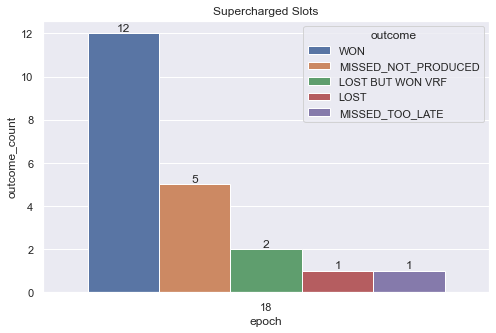

In [6]:
sns.set(rc={"figure.figsize": (8, 5)})


counts_df = (
    df[df.super_charged == True].groupby("epoch")
    .outcome.value_counts()
    .to_frame()
    .rename(columns={"outcome": "outcome_count"})
    .reset_index()
)

ax = sns.barplot(x="epoch", y="outcome_count", data=counts_df, hue="outcome")
ax.set_title("Supercharged Slots")
for container in ax.containers:
    ax.bar_label(container)

In [7]:
df[df.outcome == "MISSED_NOT_PRODUCED"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
1,18,173,128693,88883,True,False,False,[],2021-12-10 02:41:18.983000+00:00,B62qqFcoXwoynCfCqo4gbkFCbDuUZkFtb17EdRecU3VrQV...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
2,18,378,128898,88985,True,False,False,[],2021-12-10 12:57:04.594000+00:00,B62qo8FPFHTQ2J5eaCK74yfsMRBFT5bnr2iPomWLv61iGp...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
4,18,613,129133,89109,True,False,False,[],2021-12-11 00:41:43.216000+00:00,B62qpSFWPM7B8oaXBWZrX91c1unnf5Q8EYCbicKHQRwt3R...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
16,18,1455,129975,89640,True,False,False,[],2021-12-12 18:48:07.374000+00:00,B62qrXo8soPBcTi8G2EHAUxJk1hpsQKqBoc2oXsHkwczxh...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
25,18,3001,131521,False,False,False,False,[],NaT,B62qpRCBbm7enQu2co8afNQguCy3LydXxY5RimZU66JmBt...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
26,18,3029,131549,False,False,False,False,[],NaT,B62qrQiw9JhUumq457sMxicgQ94Z1WD9JChzJu19kBE8Sz...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
41,18,4876,133396,91829,True,False,False,[],2021-12-19 21:50:17.646000+00:00,B62qohKFf6PVFv3Aqz9wPbsn2ezj3DcfNJw8wuz45Sq9CT...,True,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN
55,18,6347,134867,92815,True,False,False,[],2021-12-22 23:23:33.534000+00:00,B62qiap2uo2Kt8RzoupS8jqCvAKiUZZmiXZUJM9gpmc1zq...,False,False,True,0 days,0.0,MISSED_NOT_PRODUCED,NaN


In [8]:
df[df.outcome == "MISSED_HEIGHT_DIFF"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in


In [9]:
df[df.outcome == "MISSED_TOO_LATE"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
0,18,82,128602,False,False,True,False,[0 days 00:03:25.754000],NaT,B62qidNtQcb2hTiTy15LBLMbVJ2ArRTTyUArFMYZ6S4Cp8...,True,False,True,0 days 00:03:25.754000,3.416667,MISSED_TOO_LATE,NaN
38,18,4587,133107,91655,True,True,False,"[0 days 00:03:33.985000, 0 days 00:03:50.984000]",2021-12-19 07:23:32.456000+00:00,B62qkBoe9qNqxTiXBe5euvRvZi8rCUq9TgHfM2BwmcED7A...,False,True,True,0 days 00:03:33.985000,3.550000,MISSED_TOO_LATE,NaN
40,18,4865,133385,False,False,True,False,[0 days 00:06:34.803000],NaT,B62qopfSgwEn28YdwZHh4khMy3KEG9dy8Jfrv7cveUJw2s...,False,False,True,0 days 00:06:34.803000,6.566667,MISSED_TOO_LATE,NaN


In [12]:
df[df.outcome == "LOST BUT WON VRF"]

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
8,18,836,129356,89256,True,True,False,[0 days 00:02:58.039000],2021-12-11 11:50:25.242000+00:00,B62qnKL3FsuFybueAX1GUy74FCaRmxFXayNaP1MKTJZu3Q...,True,True,False,0 days 00:02:58.039000,2.966667,LOST BUT WON VRF,NaN
35,18,4255,132775,91420,True,True,False,[0 days 00:02:50.625000],2021-12-18 14:47:20.325000+00:00,B62qnpeSkpvk7bgMWESg2654XW2MYyxWoCe881zhU8YKm2...,True,True,False,0 days 00:02:50.625000,2.833333,LOST BUT WON VRF,NaN


## slot luck
try to visualize "slot luck"


epoch 18 - expected 77 slots - got 59... 


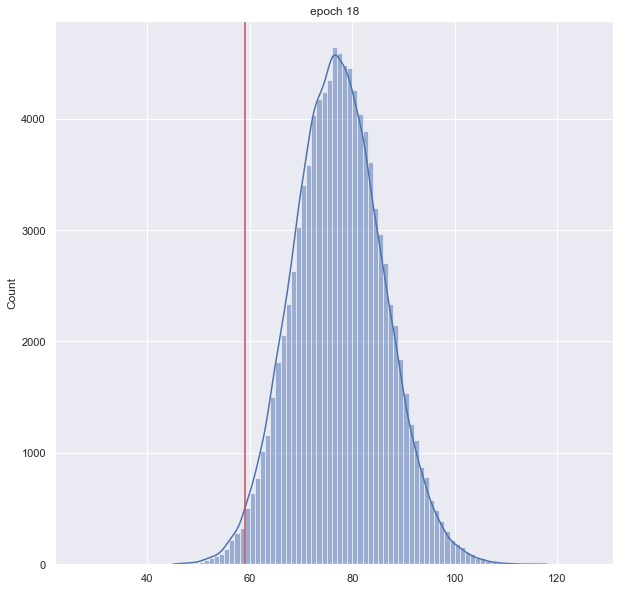

<Figure size 576x360 with 0 Axes>

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

SLOTS_PER_EPOCH = 7140

def get_slot_win_perc(stake, total_currency):
    return (1 - ((1 / 4) ** (stake / total_currency)))


epoch_data = []

total_currency = results['epoch_data']['total_currency']
total_staking_balance = results['stakes_df'].balance.sum()

slot_win_pct = get_slot_win_perc(
    total_staking_balance, total_currency
)    
expected_blocks_value = slot_win_pct * SLOTS_PER_EPOCH 

won_blocks = df[(df.epoch == epoch) & (df.outcome == 'WON')].block.count()
slots_won = df[(df.epoch == epoch)].slot.nunique()

data = binom.rvs(n=SLOTS_PER_EPOCH, p=slot_win_pct, size=100000)

k = np.arange(int(expected_blocks_value - 50), int(expected_blocks_value) + 50, 1)

plt.figure(epoch)

sns.histplot(data, kde=True, bins=k, ax=ax)
ax.axvline(slots_won, 0, 1, color="r")
ax.set_title(f"epoch {epoch}")

epoch_data.append({
    'epoch': epoch,
    'expected_slots': expected_blocks_value,
    'expected_slots_binom': binom(SLOTS_PER_EPOCH, slot_win_pct).expect(),
    'slot_win_pct': slot_win_pct,
    'won_slots': slots_won,
    'won_blocks': won_blocks,
    'orphan_rate': 1 - (won_blocks/slots_won)
})

print(f"epoch {epoch} - expected {round(expected_blocks_value)} slots - got {slots_won}... ")


plt.show()

In [11]:
epoch_slots_df = pd.DataFrame(epoch_data)

epoch_slots_df["cdf"] = epoch_slots_df.apply(
    lambda row: binom.cdf(row["won_slots"], SLOTS_PER_EPOCH, row["slot_win_pct"]),
    axis=1,
)
epoch_slots_df

,epoch,expected_slots,expected_slots_binom,slot_win_pct,won_slots,won_blocks,orphan_rate,cdf
0,18,77.265499,77.265499,0.010821,59,29,0.508475,0.017947
